# Titanic

1. Read data set

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('./train.csv')

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
#1. Drop na values (if any column has na, drop the entire row)
df_drop = df.dropna()

In [55]:
#2. 
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# VISUALIZATION

### How would Pclass affect the survival rate

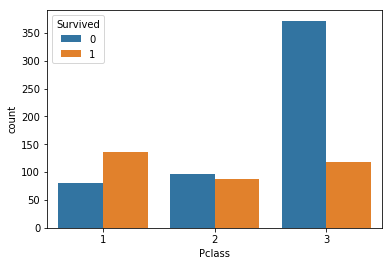

In [57]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()

## Sex and Survival Rate

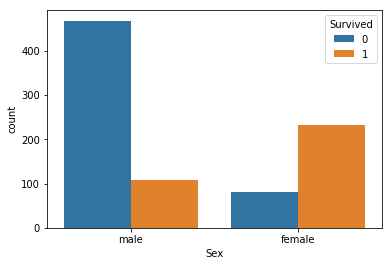

In [58]:
sns.countplot(x='Sex',hue='Survived',data=df)

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


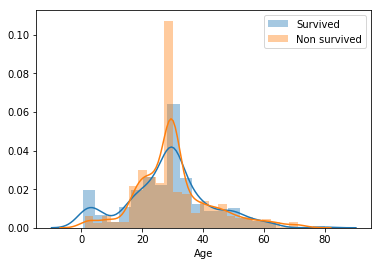

1      38.000000
2      26.000000
3      35.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
15     55.000000
17     29.699118
19     29.699118
21     34.000000
22     15.000000
23     28.000000
25     38.000000
28     29.699118
31     29.699118
32     29.699118
36     29.699118
39     14.000000
43      3.000000
44     19.000000
47     29.699118
52     49.000000
53     29.000000
55     29.699118
56     21.000000
58      5.000000
61     38.000000
65     29.699118
66     29.000000
         ...    
809    33.000000
820    52.000000
821    27.000000
823    27.000000
827     1.000000
828    29.699118
829    62.000000
830    15.000000
831     0.830000
835    39.000000
838    32.000000
839    29.699118
842    30.000000
849    29.699118
853    16.000000
855    18.000000
856    45.000000
857    51.000000
858    24.000000
862    48.000000
865    42.000000
866    27.000000
869     4.000000
871    47.000000
874    28.000000
875    15.000000
879    56.000000
880    25.0000

In [59]:
survived = df['Survived'] ==1
non_survived = df['Survived'] ==0
sns.distplot(df[survived]['Age'],label='Survived')
sns.distplot(df[non_survived]['Age'],label='Non survived')
plt.legend()
plt.show()
df[survived]['Age']


## Convert Sex male or femal in to Values

In [60]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


## Train and test model

In [62]:
X = df.drop(columns=['PassengerId','Name','Embarked','Ticket','Cabin','Survived'])
y = df['Survived']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression().fit(X_train,y_train)

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
prediction = model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test, prediction)

array([[149,  20],
       [ 41,  85]])

In [70]:
report = classification_report(y_test, prediction)

In [71]:
print(report)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       169
           1       0.81      0.67      0.74       126

   micro avg       0.79      0.79      0.79       295
   macro avg       0.80      0.78      0.78       295
weighted avg       0.80      0.79      0.79       295



## Using Decision Tree to predict Titanic data

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
treeModel = DecisionTreeClassifier(random_state=101).fit(X_train, y_train)
treePrediction = treeModel.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, treePrediction)

array([[143,  26],
       [ 38,  88]])

In [74]:
report = classification_report(y_test, treePrediction)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       169
           1       0.77      0.70      0.73       126

   micro avg       0.78      0.78      0.78       295
   macro avg       0.78      0.77      0.78       295
weighted avg       0.78      0.78      0.78       295



## Using Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier


In [76]:
treeModel = RandomForestClassifier(random_state=101).fit(X_train, y_train)
treePrediction = treeModel.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, treePrediction)

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[153,  16],
       [ 34,  92]])

In [77]:
report = classification_report(y_test, treePrediction)
print(report)


              precision    recall  f1-score   support

           0       0.82      0.91      0.86       169
           1       0.85      0.73      0.79       126

   micro avg       0.83      0.83      0.83       295
   macro avg       0.84      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295



## Visualize 

In [78]:
treeModel = DecisionTreeClassifier(random_state=101, max_depth=4)
treeModel.fit(X_train, y_train)
treePrediction = treeModel.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, treePrediction)

array([[153,  16],
       [ 42,  84]])

In [79]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

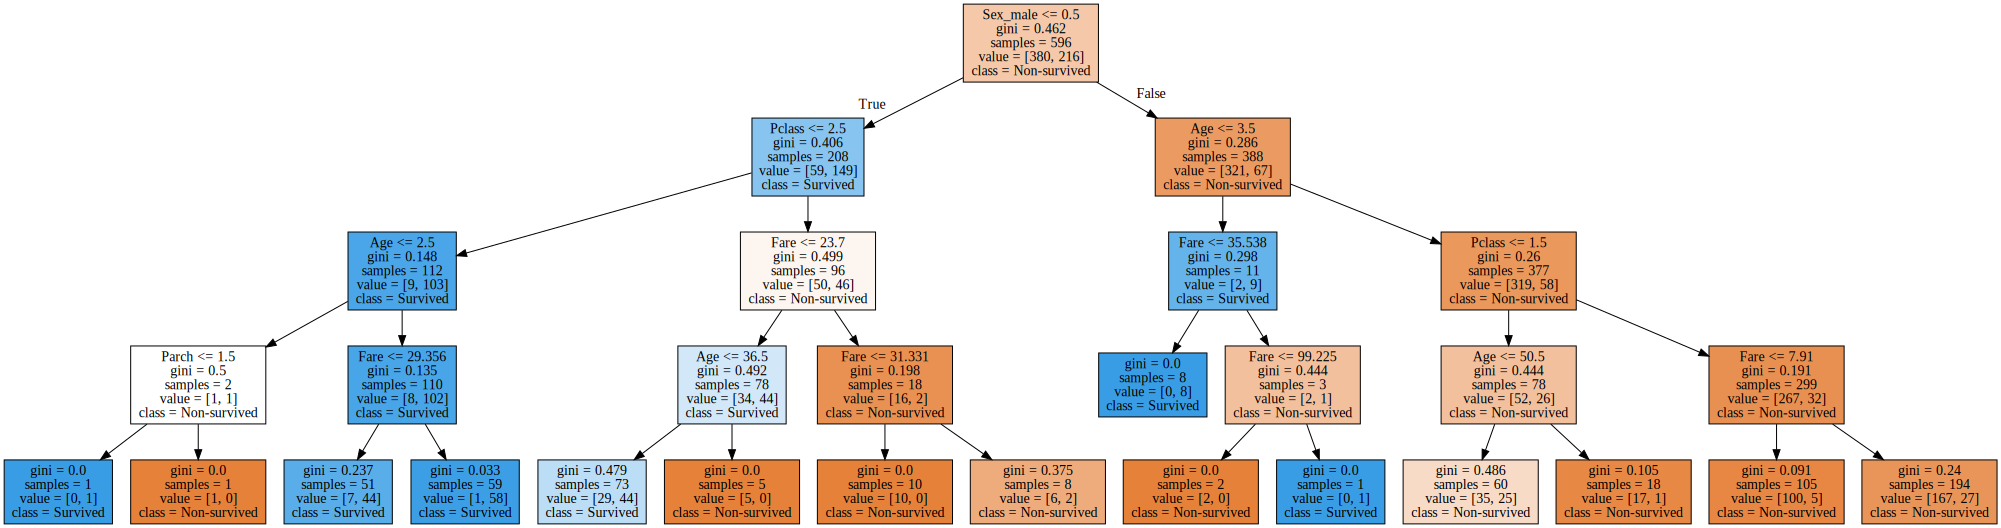

In [80]:
# viz = dtreeviz(treeModel,
#                X_train,
#                y_train,
#                target_name='variety',
#                feature_names=X_train.columns,
#                class_names=["Non-survived", "Survived"])
              
# viz.view()    

labels = X_train.columns

graph = Source(tree.export_graphviz(treeModel, out_file=None
   , feature_names=labels, class_names=["Non-survived", "Survived"] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))